# This notebook is for analyzing coalescence times
I use the coalescence_grid object to generate coalescence time distributions
I save them and here they are analyzed

In [158]:
from grid import Coalescence_Grid  # Import the important Grid Class
import numpy as np 
import matplotlib.pyplot as plt # For plotting stuff
import cPickle as pickle  # Used for pickling the intermediate Results
from scipy.special import erfc

In [159]:
data_folder="coal_times/"  # Where to save the Results to

In [160]:
# Set all the Grid Parameters:
grid = Coalescence_Grid()
grid.gridsize_x = 40
grid.gridsize_y = 40
grid.start_pos1 = [8, 5]  # Position of first Individual
grid.start_pos2 = [12, 5]  # Position of second Individual
grid.ips=10
grid.barrier=9.5
grid.barrier_strength=1.0
grid.t_max=200000 # Ca. 10000 gens per s

Grid Successfully initiliazed


## Do simulations for no barrier case

In [163]:
# Do the simulations
grid.start_pos1 = [19, 20]  # Position of first Individual
grid.start_pos2 = [19, 20]  # Position of second Individual

# Do the Grid without a Barrier:
grid.barrier_strength=1.0
coal_times = grid.return_coalescence_times(n=1000) # Do n runs

# Set Grid Parameters to Barrier:
grid.barrier_strength=0.01
coal_times_bar = grid.return_coalescence_times(n=1000)

path=data_folder + "coal89.csv"
path_bar=data_folder + "coal89_bar.csv"

# Save the simulations
np.savetxt(path, coal_times)  # Save the additional Info
np.savetxt(path_bar, coal_times_bar) # Save the Coalescence with Barrier

Doing run: 0
Doing run: 1
Doing run: 2
Doing run: 3
Doing run: 4
Doing run: 5
Doing run: 6
Doing run: 7
Doing run: 8
Doing run: 9
Doing run: 10
Doing run: 11
Doing run: 12
Doing run: 13
Doing run: 14
Doing run: 15
Doing run: 16
Doing run: 17
Doing run: 18
Doing run: 19
Doing run: 20
Doing run: 21
Doing run: 22
Doing run: 23
Doing run: 24
Doing run: 25
Doing run: 26
Doing run: 27
Doing run: 28
Doing run: 29
Doing run: 30
Doing run: 31
Doing run: 32
Doing run: 33
Doing run: 34
Doing run: 35
Doing run: 36
Doing run: 37
Doing run: 38
Doing run: 39
Doing run: 40
Doing run: 41
Doing run: 42
Doing run: 43
Doing run: 44
Doing run: 45
Doing run: 46
Doing run: 47
Doing run: 48
Doing run: 49
Doing run: 50
Doing run: 51
Doing run: 52
Doing run: 53
Doing run: 54
Doing run: 55
Doing run: 56
Doing run: 57
Doing run: 58
Doing run: 59
Doing run: 60
Doing run: 61
Doing run: 62
Doing run: 63
Doing run: 64
Doing run: 65
Doing run: 66
Doing run: 67
Doing run: 68
Doing run: 69
Doing run: 70
Doing run: 71
Do

In [146]:
# Do the analytical approximations:
# Formulas are valid for x0>0; flip if needed!    
def gaussian1d(t, dy, D=1):
    '''The One Dimensional Gaussian. 
    Differnce: Here dy notes the difference along the y axis'''
    return 1.0 / np.sqrt(4 * np.pi * D * t) * np.exp(-dy ** 2 / (4 * D * t))

def GS(t, y, x, k=1.0, D=1):
    '''1D Diffusion for same side of the Barrier'''
    n1 = np.exp(-(x - y) ** 2 / (4 * D * t)) + np.exp(-(x + y) ** 2 / (4 * D * t))
    d1 = np.sqrt(4 * np.pi * D * t)

    a2 = k / D * np.exp(2 * k / D * (y + x + 2 * k * t))
    b2 = erfc((y + x + 4 * k * t) / (2 * np.sqrt(D * t)))
    res = n1 / d1 - a2 * b2
    if np.isnan(res) or np.isinf(res):  # Check if numerical instability
        return gaussian1d(t, y-x, D=D)  # Fall back to Gaussian (to which one converges)
    else: return res
        
def GD(t, y, x, k=1.0, D=1):
    '''1D Diffusion for different sides of the Barrier'''
    a1 = k / D * np.exp(2 * k / D * (y - x + 2 * k * t))
    b1 = erfc((y - x + 4 * k * t) / (2 * np.sqrt(D * t)))
    res = a1 * b1
    if np.isnan(res) or np.isinf(res):  # Check if numerical instability
        return gaussian1d(t, y-x, D=D)  # Fall back to Gaussian (to which one converges)
    else: return res
    
def coal_prob_ss(t, dy, x0, x1, k=1.0, D=1.0, De=5):
    '''The integrand in case there is no barrier
    Product of 1d Gaussian along y-Axis and x-Axis Barrier Pdf.
    And a term for the long-distance migration'''
    return (gaussian1d(t, dy, D=D) * GS(t, x0, x1, k=k, D=D)/ (2*De))

def coal_prob_ds(t, dy, x0, x1, k=1.0, D=1.0, De=5):
    '''the integrand for cases of different sided of the barrier.
    Product of 1d Gaussian along y-Axis
    And a term for the long-distance migration'''
    return (gaussian1d(t, dy, D=D) * GD(t, x0, x1, k=k, D=D) / (2*De))

In [95]:
coal_prob_ss(t=1, dy=0, x0=0.5, x1=0.5, k=1.0, D=1.0, De=5)

0.0095239228634360195

In [69]:
# Quick inspection of means:
print("Nr of Replicates: %i " % len(coal_times_bar))
print("Mean Coelescence Time No Barrier: %.4f" % np.mean(coal_times))
print("Mean Coaltime Barrier: %.4f" % np.mean(coal_times_bar))
np.mean(coal_times_bar[:])

Nr of Replicates: 10000 
Mean Coelescence Time No Barrier: 3626.0306
Mean Coaltime Barrier: 3640.4541


3640.4540999999999

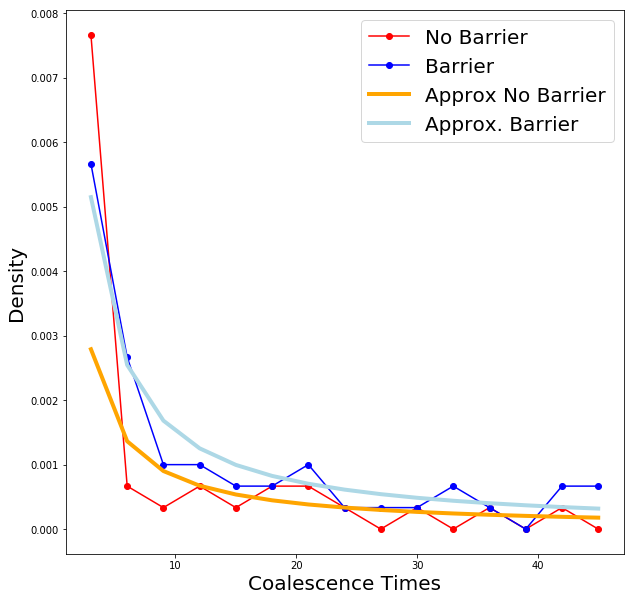

In [169]:
# Visualize Coalescence Times:
# Idea: Visualize Coalescence Times; as well as the approximation via 
# the pairwise likelihood:
# Maybe even make a picture depicting this:
# Visualize until the coalescence approximation becomes inaccurate.
x0=0.1
x1=0.1
nr = len(coal_times)
t_min=2
t_max=50
bin_width=3
bins=np.array([t_min-0.5 + i*bin_width for i in xrange(int((t_max-t_min)/float(bin_width)))])

# Make a Figure:
n, bins = np.histogram(coal_times, bins=bins) # Normed = True
n_b, bins_b = np.histogram(coal_times_bar, bins=bins)

# Normalize:
bin_width=(bins[1]-bins[0])
n = n/(float(nr) * bin_width)
n_b = n_b/(float(nr) * bin_width)

means = (bins[1:]+bins[:-1])/2.0

# Calculate the approximations:
approx = [coal_prob_ss(t=t, dy=0, x0=x0, x1=x1, k=1.0, D=1.0, De=5) for t in means]
approx_b= [coal_prob_ss(t=t, dy=0, x0=x0, x1=x1, k=0.01, D=1.0, De=5) for t in means]

plt.figure(figsize=(10,10))
plt.plot(means, n, "ro-", label="No Barrier")
plt.plot(means, n_b, "bo-", label="Barrier")

plt.plot(means, approx, label="Approx No Barrier", color="Orange", linewidth=4)
plt.plot(means, approx_b, label="Approx. Barrier", color="LightBlue", linewidth=4)
plt.xlabel("Coalescence Times", fontsize=20)
plt.ylabel("Density", fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [129]:
bins

array([  9.5       ,  10.60526316,  11.71052632,  12.81578947,
        13.92105263,  15.02631579,  16.13157895,  17.23684211,
        18.34210526,  19.44736842,  20.55263158,  21.65789474,
        22.76315789,  23.86842105,  24.97368421,  26.07894737,
        27.18421053,  28.28947368,  29.39473684,  30.5       ])

In [34]:
bins_b

array([  1.00000000e+00,   3.35710000e+03,   6.71320000e+03,
         1.00693000e+04,   1.34254000e+04,   1.67815000e+04,
         2.01376000e+04,   2.34937000e+04,   2.68498000e+04,
         3.02059000e+04,   3.35620000e+04])